In [3]:
import pandas as pd
import os
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt


from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Data Science Project/data"
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_bids = pd.read_csv("bids.csv")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Data Science Project/data


In [0]:
data_bids = data_bids.replace({' ': ''}, regex = True)

In [0]:
data_bids_sorted = data_bids.sort_values(by=['bidder_id', 'time'], ascending = [True, True]) ##sorting the data by the bidder_id and time 

In [0]:
bids = pd.DataFrame(data = data_bids_sorted["bidder_id"].unique(), columns = ["bidder_id"], index = data_bids_sorted["bidder_id"].unique()) 

In [0]:
counts = data_bids_sorted["bidder_id"].value_counts()
bids["auction_count_num"] = counts

In [0]:
timediff = data_bids_sorted.groupby("bidder_id")["time"].diff()
timediff_str = timediff.astype(str).fillna('')
data_bids_sorted["timediff_num"] = timediff
data_bids_sorted["timediff"] = timediff_str

In [0]:
text_cols = ["auction", "merchandise", "device", "timediff", "country", "ip", "url"]
for col in text_cols:
    text_str = col + "s"
    count_str = col + "_nunique_num"
    bids[text_str] = data_bids_sorted.groupby("bidder_id")[col].unique()
    bids[count_str]  = data_bids_sorted.groupby("bidder_id")[col].nunique()

In [0]:
max_time = data_bids_sorted.groupby("bidder_id")["time"].max()
bids["maxtime"] = max_time
min_time = data_bids_sorted.groupby("bidder_id")["time"].min()
bids["mintime"] = min_time
max_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
max_diff = max_diff.fillna(max_diff.mean())
bids['maxdiff_num'] = max_diff
min_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
min_diff = min_diff.fillna(min_diff.mean())
bids['mindiff_num'] = min_diff

In [0]:
overall_train = data_train.merge(data_bids,on="bidder_id")
#a = overall_train.loc[overall_train["country"] == "in"]["outcome"].sum()/len(overall_train.loc[overall_train["country"] == "in"]["outcome"])
count_stats = pd.DataFrame(columns = ["country", "count","total","prob"])
for i in data_bids["country"].unique():
  count = overall_train.loc[overall_train["country"] == i]["outcome"].sum()
  total = len(overall_train.loc[overall_train["country"] == i]["outcome"])
  if(count != 0 and total >= 10):
    count_stats = count_stats.append({"country" : i, "count": count, "total": total  "prob" : count/total},ignore_index=True)

In [82]:
count_stats.dropna()

,country,count,total,prob
0,us,66663.0,140043,0.476018
1,in,86386.0,645631,0.133801
2,py,217.0,6126,0.035423
3,ru,11100.0,53874,0.206036
4,th,17282.0,84714,0.204004
...,...,...,...,...
171,bt,3.0,12,0.250000
172,re,6.0,14,0.428571
173,bm,5.0,14,0.357143
174,pg,3.0,292,0.010274


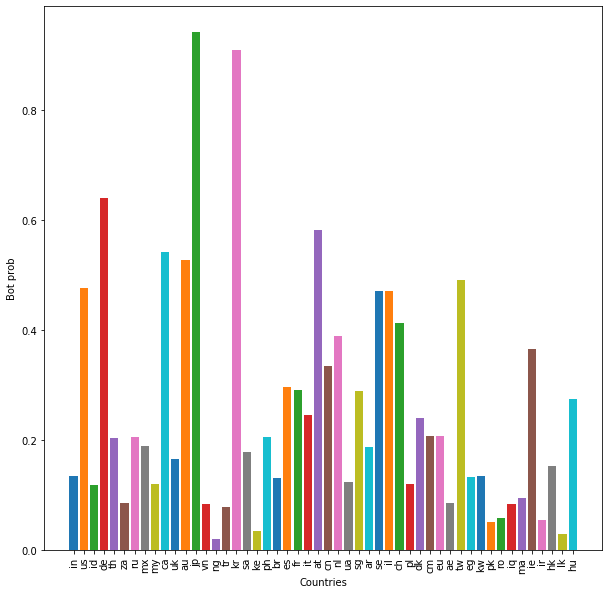

In [109]:
count_stats = count_stats.sort_values(by=["count","total", "prob"], ascending = [False,False,False])
count_stats
plt.figure(figsize=(10,10))
for i in count_stats["country"][:50]:
     plt.bar(i,count_stats.loc[count_stats["country"] == i]["prob"])
plt.xlabel("Countries")
plt.ylabel("Bot prob")
plt.xticks(rotation = 90)
plt.show()

In [110]:
count_stats.loc[count_stats["country"] == "jp"]

,country,count,total,prob
72,jp,7921.0,8419,0.940848


In [0]:
device_stats = pd.DataFrame(columns = ["numDevices", "prob"])
for i in bids["device_nunique_num"].unique():
  count = 0
  data = bids[bids["device_nunique_num"] == i]
  total = len(data)
  for bidder in data["bidder_id"]:
    outcome = overall_train.loc[overall_train["bidder_id"] == i]["outcome"] 
    if (outcome == 0.0).bool():
      count+=1
  device_stats = device_stats.append({"numDevices" : i, "count" : overall_train.loc[overall_train["country"] == i]["outcome"].sum()},ignore_index=True)
  



In [34]:
bids["device_nunique_num"].unique()

array([   1,    2,    3,    8,    6,  518,   45,    4,   67,   92,  204,
         40,  363,  165,   27,   86,   16,   34,   28,   13,    7,   38,
         55,   14,   94,   41,   12,  241,   18,   35,   70,  527,  232,
        150,  390,  611,  786,  396,  104,   31,    9,   19,   57,   56,
        650,   15,  414,   11,   85,   24,  162,  148,  503,   21,  927,
         79,  278,  920,  229,  119,   52,   30,  354,   64,  196,   48,
         43,   82,   26,  185,   66,  762,   29,    5,   17,  145,   61,
         60,   71,  192,  159,   73,   32,   84,  125,   20,   98,  235,
        138,  361,  448,   23,  559,  486,  202,  206,  365,  178,  564,
         75,  260,  340,  405,   36,  219,   78,  245,  218,  215,  376,
        416,   47,  239,  852,  349,   58,  742,   25,  115,  392,   37,
        167,   91,  290,  132,   50,  153,  312,   96,   51,  199,   42,
        238,  566,  163,  443,  315,  475,  140,  388,   10,   44,  170,
        482,   46,   87,  143,   39, 1985,  441,  3